In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [143]:
df_train = pd.read_csv('train.csv')


In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

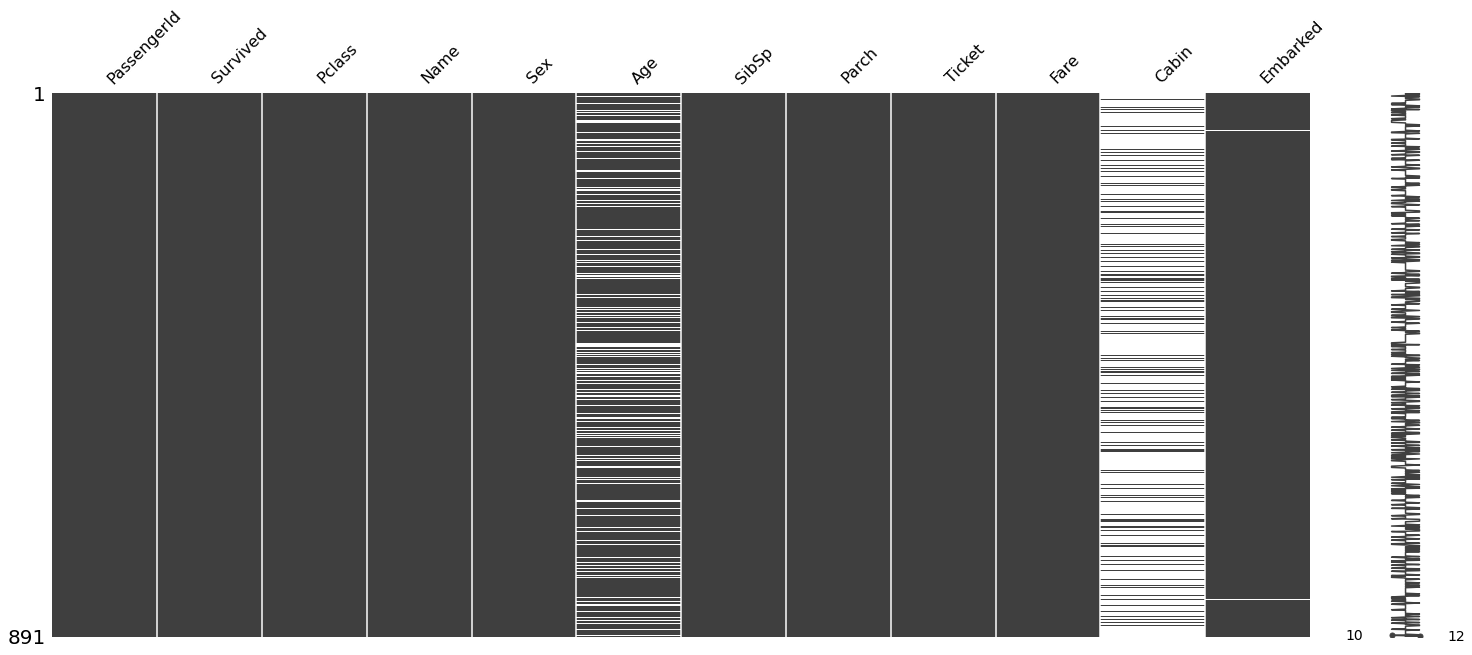

In [59]:
import missingno as msno
msno.matrix(df_train)

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Age and Cabin columns has null values. For cabin the null values are too large so it is better to ignore the column. Also name,ticket,passenger ID & Embarked columns can also be ommitted column & 

In [61]:
df_train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


#Age columns has 891-714 = 177 null values. we will replace them by mode of the available data. Since mode may predict the age group mostly boarding on the boat.

In [62]:
df_train['Age'].fillna(df_train['Age'].mode()[0], inplace = True)


In [63]:
df_train.Age.isnull().sum()

0

In [64]:
df_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [65]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,24.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


#Sex column has categorical variable in string form so need to change to numeric form

In [66]:
df_train.Sex = df_train.Sex.map({'male':0, 'female':1})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [77]:
df_train['index']= df_train.index.values
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,index
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,4
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,886
887,1,1,1,19.0,0,0,30.0000,887
888,0,3,1,24.0,1,2,23.4500,888
889,1,1,0,26.0,0,0,30.0000,889


# EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

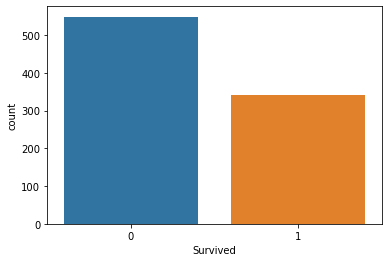

In [68]:
sns.countplot(data = df_train, x = 'Survived')

In [78]:
pd.pivot_table(df_train, values = 'index', columns = 'Survived', aggfunc = 'count' )

Survived,0,1
index,549,342


# It shows more number of passengers died than the one who survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

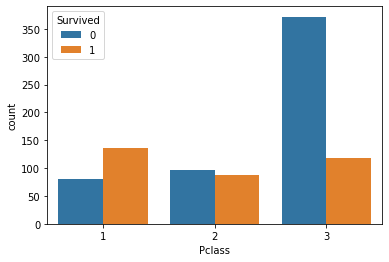

In [69]:
sns.countplot(data = df_train, x = 'Pclass', hue ='Survived')

In [79]:
pd.pivot_table(df_train, values='index', columns = 'Pclass', index ='Survived', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


# Class 3 passengers died most than other two

<AxesSubplot:xlabel='Sex', ylabel='count'>

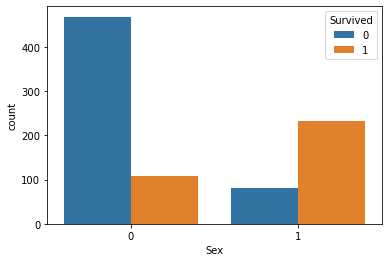

In [70]:
sns.countplot(data=df_train, x = 'Sex', hue = 'Survived')

In [80]:
pd.pivot_table(df_train, values = 'index', columns = 'Sex', index = 'Survived', aggfunc='count')

Sex,0,1
Survived,,
0,468,81
1,109,233


# Male passengers died most than female.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

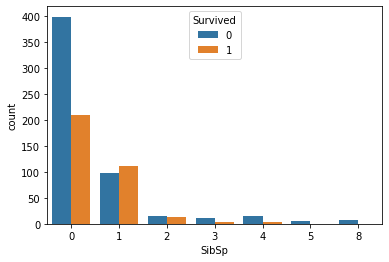

In [71]:
sns.countplot(data=df_train, x = 'SibSp', hue = 'Survived')

In [82]:
pd.pivot_table(df_train,values='index', columns='SibSp',index = 'Survived', aggfunc='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


# siblings count is not that significant on board so has no effect on survived

<AxesSubplot:xlabel='Parch', ylabel='count'>

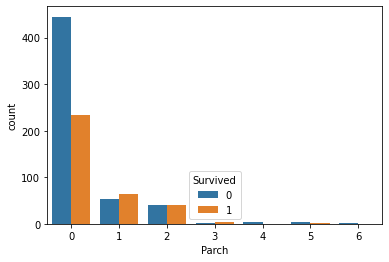

In [72]:
sns.countplot( data = df_train, x = 'Parch', hue = 'Survived')

In [85]:
pd.pivot_table(df_train,values= 'index', columns = 'Parch', index = 'Survived',aggfunc = 'count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


# relatively very few parent child pair was on board

<AxesSubplot:xlabel='Age', ylabel='Count'>

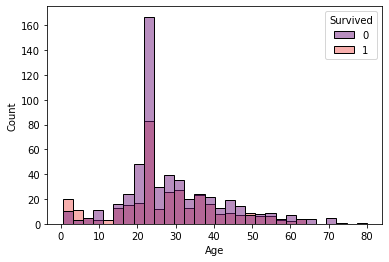

In [76]:
sns.histplot(data = df_train, x ='Age', hue = 'Survived', palette='magma')

#higher casualities in age 20-45

In [86]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,index
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,4


In [87]:
inputs = df_train.drop(['Survived','index'], axis=1)
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,24.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [88]:
targets= df_train['Survived']
targets

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [174]:
df_test_main = pd.read_csv('test.csv')
df_test = df_test_main.copy()

In [175]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

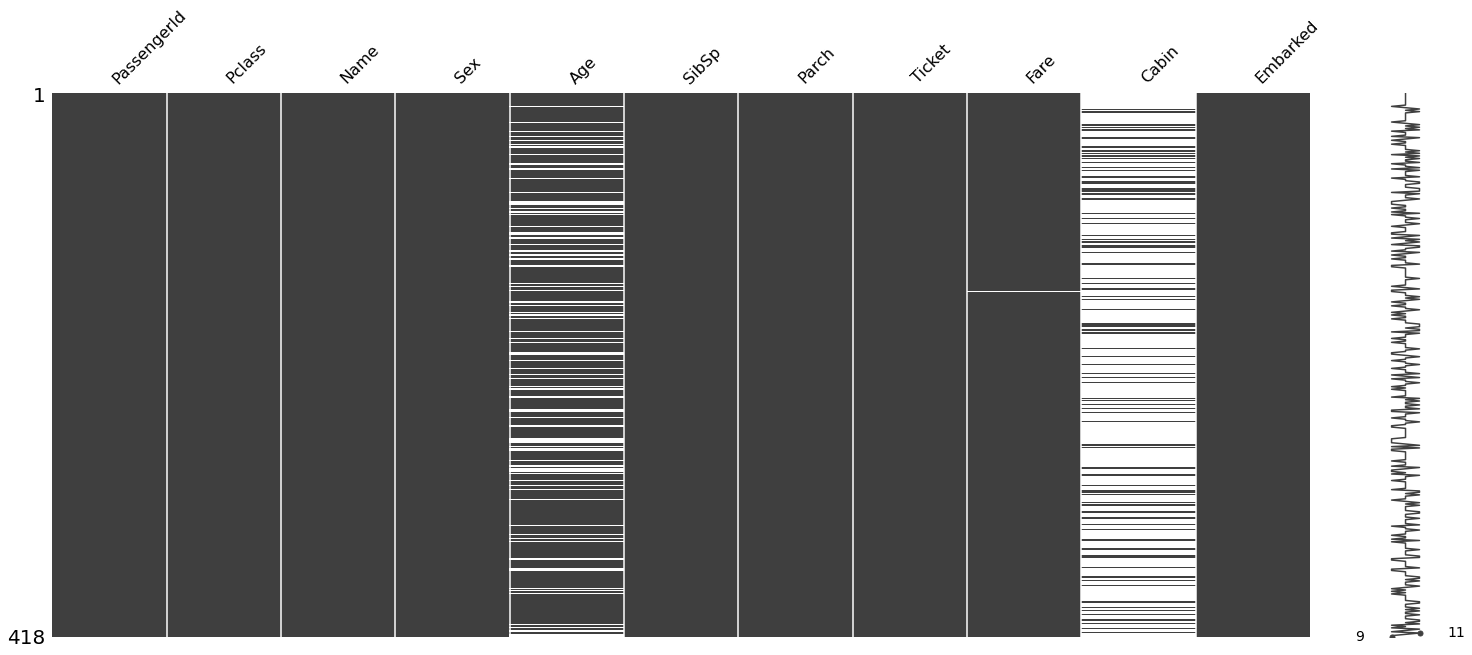

In [176]:
msno.matrix(df_test)

In [177]:
df_test['Age'].fillna(df_test['Age'].mode()[0], inplace =True)

In [178]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [179]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)


In [180]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [181]:
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [182]:
df_test['Sex']= df_test['Sex'].map({'male':0, 'female':1})
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [183]:
test= df_test.iloc[:,0:6]
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [184]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [185]:
model.fit(inputs,targets)

DecisionTreeClassifier()

In [192]:
pred = model.predict(test)
pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [196]:
df_pred = df_test_main.iloc[:,0:1]
df_pred.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [197]:
df_pred['Survived']= pred
df_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [201]:
df_pred.to_csv("Titanic_prediction_new.csv", index = False)